In [1]:
#



In [2]:
#

import numpy as np

import matplotlib.pyplot as plt

from nn import NeuralNetwork, Layer

np.random.seed(42)

In [3]:

nn = NeuralNetwork()


layer_list = []
# layer_list.append(Layer())

L01 = Layer("input", 1, None)

L02 = Layer("hidden", 1, "linear")

L03 = Layer("hidden", 1, "linear")

L04 = Layer("output", 1, "tanh")

layer_list = [L01, L02, L03]

nn._set_layers(layer_list)



Neural Network initialized
Layer initialized
Name L1 | Type: input | Neurons: 1
Layer initialized
Name L2 | Type: hidden | Neurons: 1
Layer initialized
Name L3 | Type: hidden | Neurons: 1
Layer initialized
Name L4 | Type: output | Neurons: 1


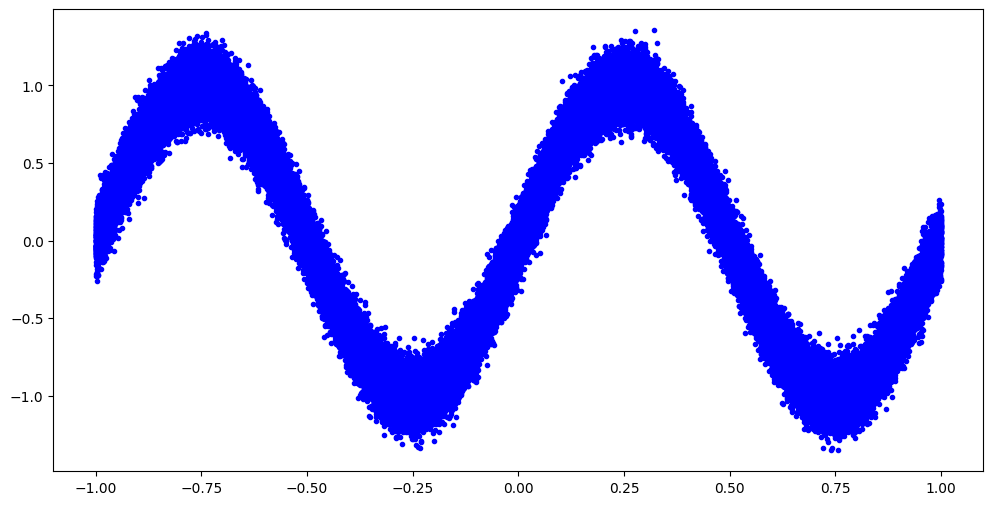

[-0.68796272 -0.68801096 -0.88383278 ...  0.0539433  -0.2979261
 -0.01357468]
[ 1.06752296  0.80335161  0.71285723 ...  0.23881495 -0.98916052
 -0.12339161]


In [4]:
N = int(1e5)

xx = 2*(np.random.rand(N) - 0.5)
# xx = np.linspace(-1,1,N)

yy = np.zeros((N,1))
yy = np.sin(2*np.pi*1*xx) + 0.1*np.random.randn(N)

plt.figure(figsize=(12,6))
# plt.plot(xx[:,0],yy[:,0])
plt.plot(xx,yy,"b.")
plt.show()

# for kx in np.arange(-1,1.25,0.25):
#     idx = abs(xx[:,0] - kx) <= 0.1/2
#     yy[idx,0] = 0.5
#     idx = abs(xx[:,0] - kx) <= 0.05/2
#     yy[idx,0] = 1
# for ky in np.arange(-1,1.25,0.25):
#     idx = abs(xx[:,1] - ky) <= 0.1/2
#     yy[idx,1] = 0.5
#     idx = abs(xx[:,1] - ky) <= 0.05/2
#     yy[idx,1] = 1

print(xx)
print(yy)

In [5]:
xx = xx.reshape(-1,1)
yy = yy.reshape(-1,1)

In [6]:
idx_train = range(0,int(0.8*xx.shape[0]))
xx_train = xx[idx_train,:]
yy_train = yy[idx_train,:]

idx_test = range(int(0.8*xx.shape[0]),xx.shape[0])
xx_test = xx[idx_test,:]
yy_test = yy[idx_test,:]

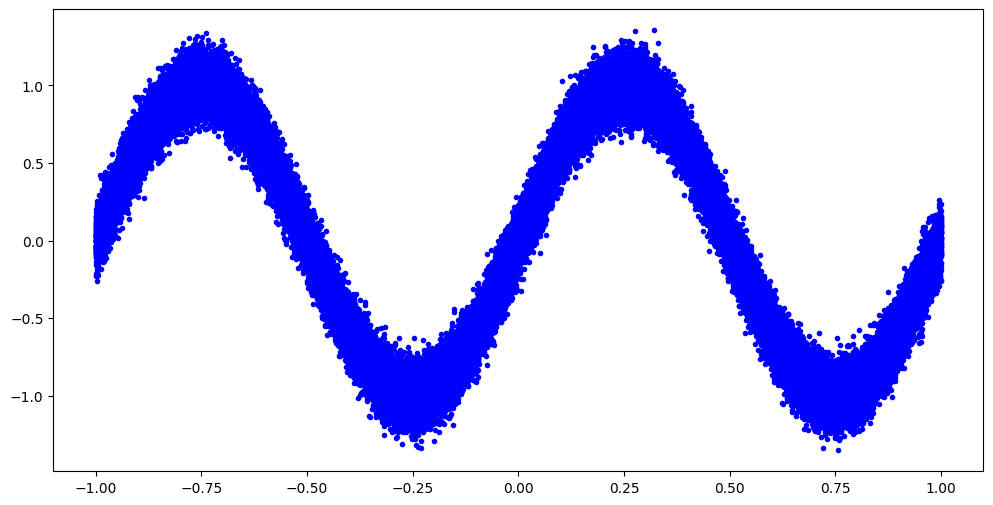

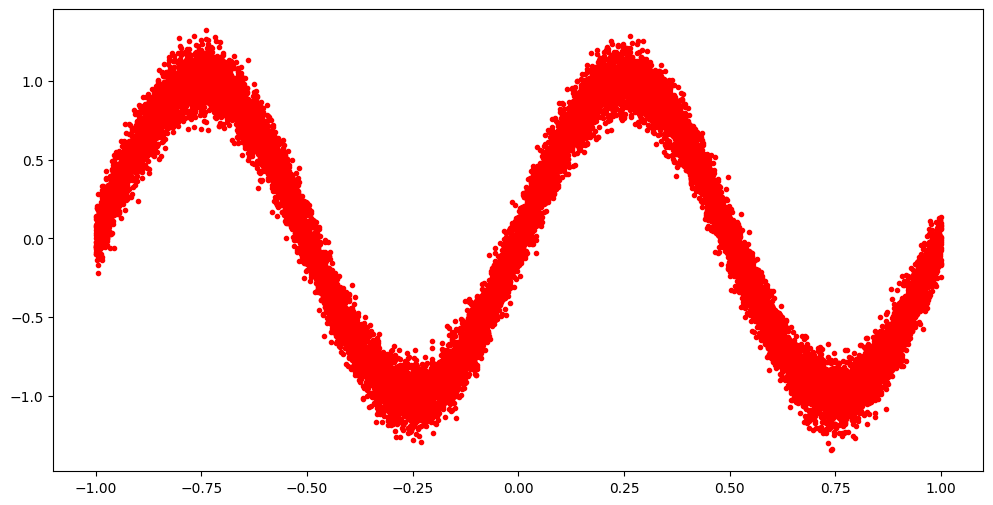

In [7]:
plt.figure(figsize=(12,6))
plt.plot(xx_train[:,0],yy_train[:,0],"b.")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(xx_test[:,0],yy_test[:,0],"r.")
plt.show()

In [12]:

for k1 in range(0,xx_train.shape[0]):

    nn._train_step(xx_train[[k1],:].T,yy_train[[k1],:].T)

    if (k1+1) % 1000 == 0:

        print(f"##### Training step {k1}")
        print(nn.layer_list[2].weights)

##### Training step 999
[[1.4946857]]
##### Training step 1999
[[1.49912378]]
##### Training step 2999
[[1.50348892]]
##### Training step 3999
[[1.50812078]]
##### Training step 4999
[[1.51273742]]
##### Training step 5999
[[1.51738666]]
##### Training step 6999
[[1.52215213]]
##### Training step 7999
[[1.52711744]]
##### Training step 8999
[[1.5319831]]
##### Training step 9999
[[1.53663476]]
##### Training step 10999
[[1.54134514]]
##### Training step 11999
[[1.5461801]]
##### Training step 12999
[[1.55116603]]
##### Training step 13999
[[1.55640113]]
##### Training step 14999
[[1.56131933]]
##### Training step 15999
[[1.56668636]]
##### Training step 16999
[[1.57153637]]
##### Training step 17999
[[1.57644623]]
##### Training step 18999
[[1.58135775]]
##### Training step 19999
[[1.5865898]]
##### Training step 20999
[[1.59160625]]
##### Training step 21999
[[1.5972084]]
##### Training step 22999
[[1.60215437]]
##### Training step 23999
[[1.60750567]]
##### Training step 24999
[[1.61

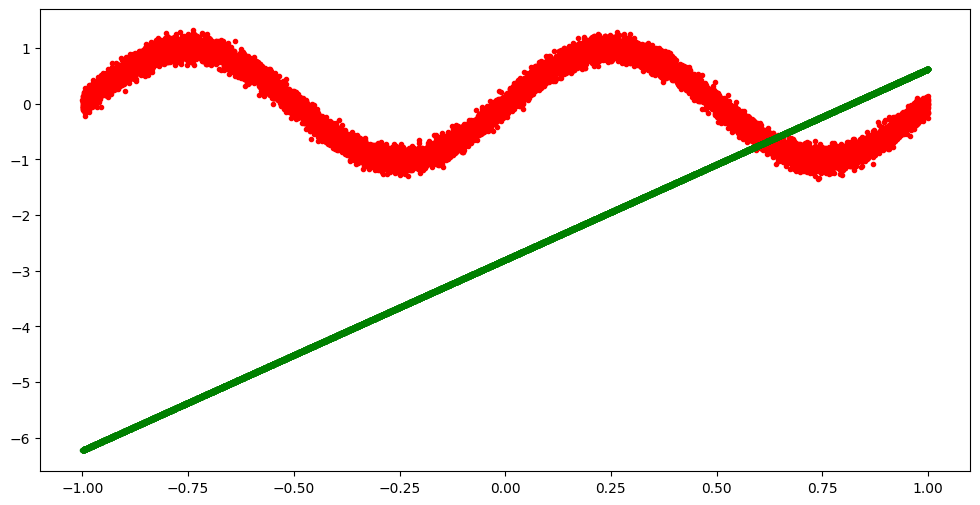

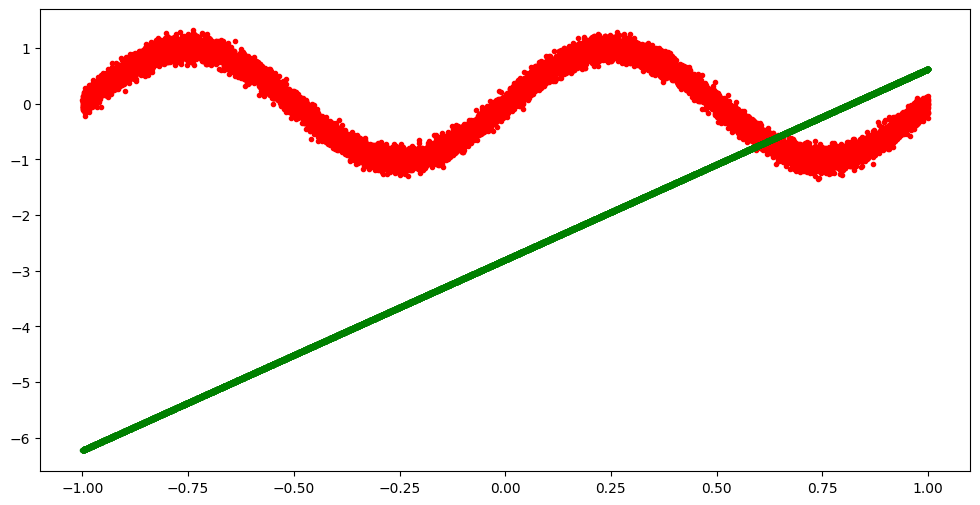

In [16]:
yy_pred = np.zeros(yy_test.shape)

for k1 in range(0,xx_test.shape[0]):

    yy_pred[k1,:] = nn._compute_output(xx_test[[k1],:])

plt.figure(figsize=(12,6))
plt.plot(xx_test[:,0],yy_test[:,0],"r.")
plt.plot(xx_test[:,0],yy_pred[:,0],"g.")
plt.show()


yy_pred = np.zeros(yy_test.shape)

yy_pred = nn._compute_output(xx_test.T).T

plt.figure(figsize=(12,6))
plt.plot(xx_test[:,0],yy_test[:,0],"r.")
plt.plot(xx_test[:,0],yy_pred[:,0],"g.")
plt.show()

In [15]:
yy_pred.shape

(1, 20000)

In [11]:
yy_pred = np.zeros(yy_test.shape)

In [13]:
xx_train.shape

(80000, 1)

In [2]:
xx_train

NameError: name 'xx_train' is not defined

In [ ]:
from